In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


import pandas as pd
import random

from IPython.display import HTML, display
#import tabulate

def PrintXL(*arg):
    html="<span style='font-size: 22px;font-weight:700'>"
    for a in arg:
        html += str(a)
    html +="</span>"
    display(HTML(html))
    
def PrintL(*arg):
    html="<span style='font-size: 18px;font-weight:700'>"
    for a in arg:
        html += str(a)
    html +="</span>"
    display(HTML(html))
    
def PrintM(*arg):
    html="<div width='100%'' style='font-size: 15px;font-weight:500; line-height:14px'>"
    for a in arg:
        html += str(a)
    html +="</div>"
    display(HTML(html))
    
import math
sigmoid = lambda y: 1.0/(1+math.exp(-y))

## Hypothesis Function For One Feature
<img src="./files/hypothesis.png">
<br><br>

## Hypothesis Function for Many Features
<img src="./files/bighyp.png">
<br><br>

### Update Weights
### α = learning rate

<img src="./files/gradientdescent.png">
<br><br>

You have to take the partial derivate of the cost function, relative to the theta you are currently updating.<br>
You have to update all thetas at the same time.  The update of one theta cannot interfere with the update of another.<br>

# Cost Function

<img src="./files/costfunction.png">



In [2]:
# b and m are weights
# X are features (ex sq ft of house)
# Y are answers (ex price of house)
# hypothesis =    hθ = mx+b   ..same as..   hθ = θ(0) + θ(1)x
def costFunction(b,m, X, Y):
    sumOfSE=0
    n = float(len(X))  # I use m above but whatev
    for x,y in zip(xs,ys):
        hypothesis = m*x+b
        error = y - hypothesis
        squaredError = error**2
        sumOfSE += squaredError
    cost = 1/n * sumOfSE
    return cost;

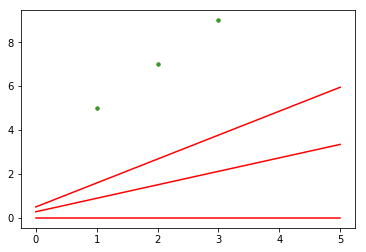

In [3]:
# don't worry about any of this
# https://scriptverse.academy/tutorials/python-matplotlib-plot-straight-line.html
def elPlotto(m,b,xs,ys,show):
    x = np.linspace(0,5,65)
    y=m*x+b
    plt.plot(xs,ys, '.')
    plt.plot(x,y,'-r')
    if show is True:
        plt.show()

## this code is written to be human readable and look like the formulas.
# other versions of this would try to be effecient for Python, not a humans
# b and m are weights
# X are features (ex sq ft of house)
# Y are answers (ex price of house)
# hypothesis =    hθ = mx+b   ..same as..   hθ = θ(0) + θ(1)x
def updateWeights(b,m, xs, ys, learning_rate):
    #print(X,Y,xs,ys)
    bDerivativeSum=0
    mDerivativeSum=0
    n = float(len(xs))
    for x,y in zip(xs,ys):
        hypothesis = m*x+b
        error = y - hypothesis
        # Calculate partial derivatives
        # -2(y - (mx + b))
        bDerivativeSum +=  - (error)      
        # -2(y - (mx + b)) * x
        mDerivativeSum +=  - (error * x)
        
    cost=costFunction(b,m,xs,ys)

    # We subtract because the derivatives point in direction of steepest ascent
    # equation to adjust the weights is 
    #   b = b - learningRate*sum
    #   m = m - learningRate*sum * x
    # They must be updated simultaneously, which is why we use derivative variables
    b = b  -  2/n * bDerivativeSum * learning_rate
    m = m  -  2/n * mDerivativeSum * learning_rate
   

    return [b,m,cost]

# some of the below is just restated for ease of reading
# alpha is the learning rate
b=0  
m=0
alpha=0.02
cost=0
xs = np.array([1, 2, 3])
ys = np.array([5, 7, 9])
iterations=2

elPlotto(m,b,xs,ys,False)

PrintL("Starting Weights:")
PrintM('θ(0) aka b = ',b, '<br>θ(1) aka m = ',m)

for i in range(iterations):
    [b,m,cost] = updateWeights(b,m,xs,ys,alpha)
    elPlotto(m,b,xs,ys,False)
    PrintL(f"After {i+1} interation(s):")
    PrintM('θ(0) aka b = ',b, '<br>θ(1) aka m = ',m,"<br>Cost = ", cost)



# Logistic Regression
<img src="./files/crossentropy.png">

In [4]:
import numpy as np
import math


def sigmoid(z):
    return 1.0/(1+math.exp(-z))

def crossEntropy(features, targets, weights):
    ce = 0
    for x, t in zip(features, targets):
        h = sigmoid(sum(weights*x))
        ce = ce + -1*(t*slog(h) + (1-t)*slog(1-h))
    return ce

def hypothesis(ws, x):
    return sigmoid(sum(np.dot(ws, x)))


def costFunctionLogReg(theta):
    if (y == 1):
        -1 * math.log(hypothesis(x))
    else:
        -1 * math.log(1 - hypothesis(x))


def logit(x):
    odds = sigmoid(x) / (1 - sigmoid(x))


def slog(x):
    return 0 if x == 0 else math.log(x)





features = np.array([[1, 2, 3], [1, 3, 4], [1, 4, 5],
                     [1, 5, 6], [1, 6, 7], [1, 8, 9]])
targets = np.array([0, 0, 0, 1, 1, 1])
weights = np.array([0, 0, 0])
g = np.array([0, 0, 0])
e = 0
rate = 0.020

e = crossEntropy(features, targets, weights)
print(e)


4.1588830833596715
